# Lehnert Control

Experiments in: `/miniscratch/chenant/ant/sr_return/2021-02-22/11-50-00_leh/`

Today: Feb 22, 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import files

In [2]:
epis_avg_in_path = '/Users/anthony/Playground/tensorboard_logs/sr_return/2021-02-22/11-50-00_leh/epis-avg_progress-filtered.csv'
epis_avg_sep = '\|'

In [4]:
episAvg_df = pd.read_csv(epis_avg_in_path, epis_avg_sep)

del episAvg_df['Unnamed: 0']

print(len(episAvg_df))
episAvg_df[0:3]

300


/Users/anthony/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,num_episodes,envCls_name,env_kwargs,agentCls_name,seed,gamma,lamb,eta_trace,lr,reward_lr,sf_lr,policy_epsilon,use_lambda_q_control,optim,episode_idx,total_steps,cumulative_reward,value_loss_avg,sf_loss_avg,reward_loss_avg
0,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",LambdaSFQAgent,4,0.9,0.0,0.0,0.001,None,None,0.3,True,"{'cls_string': 'SGD', 'kwargs': None}",1999.5,115.88025,0.76500,0.010102,0.0,0.000086
1,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",LambdaSFQAgent,4,0.9,0.0,0.0,0.010,None,None,0.3,True,"{'cls_string': 'SGD', 'kwargs': None}",1999.5,51.59450,0.96550,0.012988,0.0,0.000031
2,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",LambdaSFQAgent,4,0.9,0.0,0.0,0.100,None,None,0.3,True,"{'cls_string': 'SGD', 'kwargs': None}",1999.5,29.72125,0.99525,0.004156,0.0,0.000005


In [5]:
episAvg_df.columns

Index(['num_episodes', 'envCls_name', 'env_kwargs', 'agentCls_name', 'seed',
       'gamma', 'lamb', 'eta_trace', 'lr', 'reward_lr', 'sf_lr',
       'policy_epsilon', 'use_lambda_q_control', 'optim', 'episode_idx',
       'total_steps', 'cumulative_reward', 'value_loss_avg', 'sf_loss_avg',
       'reward_loss_avg'],
      dtype='object')

In [11]:
print(set(episAvg_df['envCls_name']))
print('env_kwargs', len(set(episAvg_df['env_kwargs'])), set(episAvg_df['env_kwargs']))
print(set(episAvg_df['agentCls_name']))
print('lamb', set(episAvg_df['lamb']))
print('eta_trace', set(episAvg_df['eta_trace']))
print('lr', set(episAvg_df['lr']))
print('reward_lr', set(episAvg_df['reward_lr']))
print('sf_lr', set(episAvg_df['sf_lr']))
print('use_lambda_q_control', set(episAvg_df['use_lambda_q_control']))
print('optim', len(set(episAvg_df['optim'])), set(episAvg_df['optim']))

{'LehnertGridWorldEnv'}
env_kwargs 1 {"{'width': 10, 'slip_prob': 0.05, 'episode_max_length': 200, 'start_switch_freq': 400, 'goal_switch_freq': 400}"}
{'LambdaSFQAgent'}
lamb {0.0, 0.5, 0.3, 0.9, 0.7, 1.0}
eta_trace {0.0}
lr {0.1, 0.3, 0.2, 0.01, 0.001}
reward_lr {'None'}
sf_lr {'None'}
use_lambda_q_control {True}
optim 1 {"{'cls_string': 'SGD', 'kwargs': None}"}


## Plot best figures

#### Method to get the best hyperparameters

In [6]:
def get_averaged_best_rmse_param_df(avg_df, filters=None):
    dep_col = 'total_steps'
    indep_cols = ['agentCls_name', 'lamb', 'eta_trace', 'optim']
    search_cols = ['lr', 'reward_lr', 'sf_lr']
    
    
    # ==
    # Search for best parameters 
    df = avg_df.copy(deep=True)
    
    cur_idx = (df.groupby(indep_cols)[dep_col].transform(min) 
               == df[dep_col])
    
    cur_filter_df = df[cur_idx].reset_index()
    idxs = (pd.merge(df, cur_filter_df, 
                     on=(indep_cols + search_cols), how='left', 
                     indicator=True)['_merge'] 
            == 'both')
    
    best_df = df[idxs]
    
    return best_df
    

avg_best_param_df = get_averaged_best_rmse_param_df(episAvg_df)
print(len(avg_best_param_df))
avg_best_param_df[0:2]

60


,num_episodes,envCls_name,env_kwargs,agentCls_name,seed,gamma,lamb,eta_trace,lr,reward_lr,sf_lr,policy_epsilon,use_lambda_q_control,optim,episode_idx,total_steps,cumulative_reward,value_loss_avg,sf_loss_avg,reward_loss_avg
4,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",LambdaSFQAgent,4,0.9,0.0,0.0,0.3,None,None,0.3,True,"{'cls_string': 'SGD', 'kwargs': None}",1999.5,20.16475,0.9975,0.002603,0.000000,0.000004
9,4000,LehnertGridWorldEnv,"{'width': 10, 'slip_prob': 0.05, 'episode_max_...",LambdaSFQAgent,4,0.9,0.3,0.0,0.3,None,None,0.3,True,"{'cls_string': 'SGD', 'kwargs': None}",1999.5,21.88175,0.9995,0.002498,0.036039,0.000004


Get the best parameter for each lambda

In [15]:
avg_best_param_df.groupby(['lamb']).mean()

,num_episodes,seed,gamma,eta_trace,lr,policy_epsilon,use_lambda_q_control,episode_idx,total_steps,cumulative_reward,value_loss_avg,sf_loss_avg,reward_loss_avg
lamb,,,,,,,,,,,,,
0.0,4000,11,0.9,0.0,0.3,0.3,True,1999.5,21.756850,0.996950,0.002583,0.000000,0.000004
0.3,4000,11,0.9,0.0,0.3,0.3,True,1999.5,20.628150,0.998525,0.002538,0.036206,0.000004
0.5,4000,11,0.9,0.0,0.3,0.3,True,1999.5,19.193450,0.998875,0.002954,0.071839,0.000003
0.7,4000,11,0.9,0.0,0.3,0.3,True,1999.5,18.294425,0.997975,0.003790,0.121661,0.000003
0.9,4000,11,0.9,0.0,0.2,0.3,True,1999.5,35.692100,0.907625,0.006805,0.243687,0.000004
1.0,4000,11,0.9,0.0,0.3,0.3,True,1999.5,21.062250,0.996350,1.608160,0.280666,0.000003


#### Plot

(15.0, 35.0)

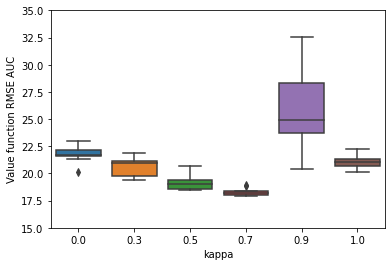

In [14]:
def script_plt_best_param_x_lamb_boxplot(best_df):
    # ==
    plt_x = 'lamb'
    plt_y = 'total_steps'
    
    filters = {
        'agentCls_name': 'LambdaSFQAgent',
        'eta_trace': 0.0,
    }
    
    df = best_df.copy(deep=True)
    for k in filters:
        df = df[df[k] == filters[k]]
    
    sns.boxplot(x=plt_x, y=plt_y, 
                 data=df)
    plt.ylabel('Value function RMSE AUC')
    plt.xlabel('kappa')
    
    
script_plt_best_param_x_lamb_boxplot(avg_best_param_df)
plt.ylim([15, 35])

**Next step**: plot the learning trajectory for each 